In [1]:
import os
import sys
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import scipy
from scipy import stats
from scipy.stats import linregress

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

warnings.simplefilter('ignore')

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
dataset = pd.read_csv('PGA_Data_Historical.csv')
data = dataset[dataset['Variable'].isin(['SG: Off-the-Tee - (TOTAL SG:OTT)',
                                         'SG: Approach-the-Green - (TOTAL SG:APP)',
                                         'SG: Around-the-Green - (TOTAL SG:ARG)',
                                         'SG: Putting - (TOTAL SG:PUTTING)', 
                                         'Driving Distance - (AVG.)',
                                         'Driving Pct. 300-320 (All Drives) - (%)',
                                         'Driving Pct. 320+ (All Drives) - (%)',
                                         'Driving Accuracy Percentage - (%)', 
                                         'Going for the Green - Hit Green Pct. - (%)', 
                                         'Greens in Regulation Percentage - (%)',
                                         'Birdie or Better Percentage - (%)',
                                         '3-Putt Avoidance - (%)'])]

data['Value'] = pd.to_numeric(data['Value'])

In [3]:
pivot = pd.pivot_table(data = data, index = ['Player Name',"Season"], columns = 'Variable', values = 'Value')

In [4]:
pivot_index = pivot.reset_index()
pivot_index.head()

Variable,Player Name,Season,3-Putt Avoidance - (%),Birdie or Better Percentage - (%),Driving Accuracy Percentage - (%),Driving Distance - (AVG.),Driving Pct. 300-320 (All Drives) - (%),Driving Pct. 320+ (All Drives) - (%),Going for the Green - Hit Green Pct. - (%),Greens in Regulation Percentage - (%),SG: Approach-the-Green - (TOTAL SG:APP),SG: Around-the-Green - (TOTAL SG:ARG),SG: Off-the-Tee - (TOTAL SG:OTT),SG: Putting - (TOTAL SG:PUTTING)
0,Aaron Baddeley,2010,1.89,21.63,56.65,298.9,26.04,10.78,19.53,64.60,-70.141,34.397,9.844,44.202
1,Aaron Baddeley,2011,2.53,23.09,55.67,296.2,25.92,7.95,22.22,65.48,12.170,27.152,11.751,20.080
2,Aaron Baddeley,2012,2.47,19.75,54.30,292.0,20.16,13.18,20.69,58.10,-27.731,8.343,-5.945,33.197
3,Aaron Baddeley,2013,NaN,20.20,50.71,288.5,NaN,NaN,NaN,58.00,NaN,NaN,NaN,NaN
4,Aaron Watkins,2013,NaN,19.32,63.03,277.1,NaN,NaN,NaN,62.25,NaN,NaN,NaN,NaN


In [5]:
df_row_merged = pivot_index.dropna()
len(df_row_merged)

569

### Start Labeling

In [6]:
#2010 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Phil Mickelson') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Lee Westwood') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Anthony Kim') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'K.J. Choi') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tiger Woods') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Fred Couples') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Nick Watney') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Hunter Mahan') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Y.E. Yang') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ricky Barnes') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)

In [7]:
#2011 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Charl Schwartzel') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jason Day') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Adam Scott') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Luke Donald') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Geoff Ogilvy') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tiger Woods') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Angel Cabrera') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'K.J. Choi') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bo Van Pelt') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ryan Palmer') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Edoardo Molinari') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)

In [8]:
#2012 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bubba Watson') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Louis Oosthuizen') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Peter Hanson') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Matt Kuchar') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Phil Mickelson') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Lee Westwood') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ian Poulter') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Padraig Harrington') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Justin Rose') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Adam Scott') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)

In [9]:
#2013 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Adam Scott') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Angel Cabrera') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jason Day') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Marc Leishman') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tiger Woods') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Thorbjorn Olesen') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Brandt Snedeker') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Sergio Garcia') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Matt Kuchar') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Lee Westwood') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)

In [10]:
#2014 Top Performaers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bubba Watson') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jonas Blixt') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jordan Spieth') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Miguel Angel Jimenez') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rickie Fowler') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Matt Kuchar') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Lee Westwood') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Thomas Bjorn') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bernhard Langer') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)

In [11]:
#2015 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jordan Spieth') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Phil Mickelson') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Justin Rose') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rory McIlroy') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Hideki Matsuyama') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Paul Casey') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Dustin Johnson') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ian Poulter') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Charley Hoffman') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Zach Johnson') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)

In [12]:
#2016 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Danny Willett') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jordan Spieth') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Lee Westwood') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Paul Casey') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'J.B. Holmes') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Dustin Johnson') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Matthew Fitzpatrick') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Soren Kjeldsen') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Hideki Matsuyama') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Daniel Berger') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)

In [13]:
#2017 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Sergio Garcia') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Justin Rose') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Charl Schwartzel') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Matt Kuchar') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Thomas Pieters') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Paul Casey') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Kevin Chappell') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rory McIlroy') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ryan Moore') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Adam Scott') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)

In [14]:
#2018 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Patrick Reed') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rickie Fowler') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jordan Spieth') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jon Rahm') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rory McIlroy') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Cameron Smith') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Henrik Stenson') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bubba Watson') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Marc Leishman') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tony Finau') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)

In [15]:
#2019 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tiger Woods') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Dustin Johnson') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Brooks Koepka') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Xander Schauffele') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jason Day') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tony Finau') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Francesco Molinari') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Web Simpson') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Patrick Cantlay') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ricky Fowler') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'John Rahm') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)

In [16]:
df_row_merged = df_row_merged.fillna(0)

len(df_row_merged)

569

In [17]:
Label = df_row_merged['Label'].to_list()
blob_prep = df_row_merged[['SG: Approach-the-Green - (TOTAL SG:APP)',
                           'SG: Around-the-Green - (TOTAL SG:ARG)',
                           'SG: Off-the-Tee - (TOTAL SG:OTT)',
                           'SG: Putting - (TOTAL SG:PUTTING)']]

In [18]:
blob_prep.head()

Variable,SG: Approach-the-Green - (TOTAL SG:APP),SG: Around-the-Green - (TOTAL SG:ARG),SG: Off-the-Tee - (TOTAL SG:OTT),SG: Putting - (TOTAL SG:PUTTING)
0,-70.141,34.397,9.844,44.202
1,12.170,27.152,11.751,20.080
2,-27.731,8.343,-5.945,33.197
5,60.547,-1.382,24.523,-38.883
6,4.603,-0.580,35.670,-11.119


In [19]:
X = np.array(blob_prep.astype(float))

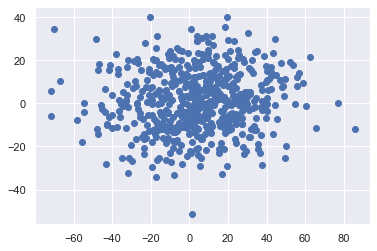

In [20]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)

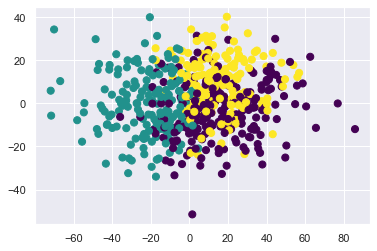

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

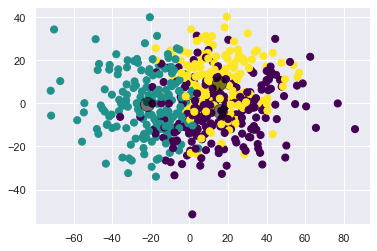

In [23]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

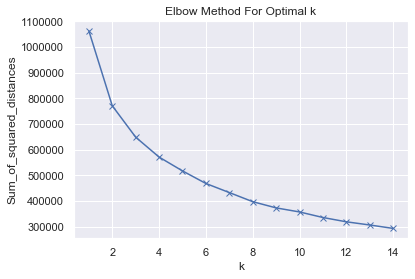

In [24]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
cluster = kmeans.labels_
blob_prep['Cluster'] = cluster.tolist()
blob_prep['Labels'] = Label

winners = blob_prep[blob_prep['Labels'] == 1]
winners.groupby(['Cluster']).count()

Variable,SG: Approach-the-Green - (TOTAL SG:APP),SG: Around-the-Green - (TOTAL SG:ARG),SG: Off-the-Tee - (TOTAL SG:OTT),SG: Putting - (TOTAL SG:PUTTING),Labels
Cluster,,,,,
0,12,12,12,12,12
1,2,2,2,2,2
2,10,10,10,10,10


In [26]:
group0 = winners[winners['Cluster'] == 0]
group1 = winners[winners['Cluster'] == 1]
group2 = winners[winners['Cluster'] == 2]

group0_mean = group0[['SG: Approach-the-Green - (TOTAL SG:APP)', 'SG: Around-the-Green - (TOTAL SG:ARG)','SG: Off-the-Tee - (TOTAL SG:OTT)', 'SG: Putting - (TOTAL SG:PUTTING)']].mean().values
group1_mean = group1[['SG: Approach-the-Green - (TOTAL SG:APP)', 'SG: Around-the-Green - (TOTAL SG:ARG)','SG: Off-the-Tee - (TOTAL SG:OTT)', 'SG: Putting - (TOTAL SG:PUTTING)']].mean().values
group2_mean = group2[['SG: Approach-the-Green - (TOTAL SG:APP)', 'SG: Around-the-Green - (TOTAL SG:ARG)','SG: Off-the-Tee - (TOTAL SG:OTT)', 'SG: Putting - (TOTAL SG:PUTTING)']].mean().values

In [27]:
dff = pd.DataFrame([group0_mean,group1_mean,group2_mean],index=[0,1,2],columns=['SG: Approach-the-Green - (TOTAL SG:APP)', 'SG: Around-the-Green - (TOTAL SG:ARG)','SG: Off-the-Tee - (TOTAL SG:OTT)', 'SG: Putting - (TOTAL SG:PUTTING)'])



In [28]:
dff

,SG: Approach-the-Green - (TOTAL SG:APP),SG: Around-the-Green - (TOTAL SG:ARG),SG: Off-the-Tee - (TOTAL SG:OTT),SG: Putting - (TOTAL SG:PUTTING)
0,22.234417,4.0210,30.727417,-4.935667
1,-9.227000,-1.0100,7.347500,3.967500
2,26.022300,10.7083,1.574900,20.865800


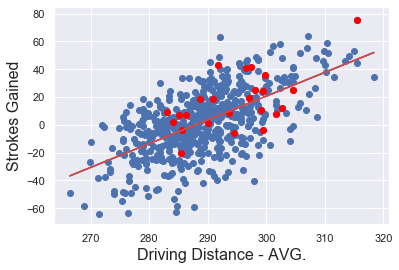

The r-squared is: 0.6094239921146456


<Figure size 432x288 with 0 Axes>

In [29]:
#Driving Distance - AVG.

'''The average number of yards per measured drive. These drives are measured on two holes per round. 
Care is taken to select two holes which face in opposite directions to counteract the effect of wind. 
Drives are measured to the point at which they come to rest regardless of whether they are in the fairway or not.'''

x_values = df_row_merged['Driving Distance - (AVG.)']
y_values = df_row_merged['SG: Off-the-Tee - (TOTAL SG:OTT)']
f=df_row_merged.loc[df_row_merged['Label']==1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.scatter(f['Driving Distance - (AVG.)'],f['SG: Off-the-Tee - (TOTAL SG:OTT)'], color='red')
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Driving Distance - AVG.',size=16)
# set y-axis label and specific size
plt.ylabel('Strokes Gained',size=16)

plt.show()

print(f"The r-squared is: {rvalue}")

# save the plot as PNG file with dpi=150
plt.savefig('Driving_distance.png', dpi=150)

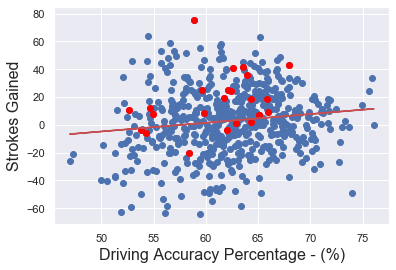

The r-squared is: 0.1347639606352375


<Figure size 432x288 with 0 Axes>

In [30]:
#Driving Accuracy Percentage - (%)

'''The percentage of time a tee shot comes to rest in the fairway (regardless of club).'''

x_values = df_row_merged['Driving Accuracy Percentage - (%)']
y_values = df_row_merged['SG: Off-the-Tee - (TOTAL SG:OTT)']
f=df_row_merged.loc[df_row_merged['Label']==1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.scatter(f['Driving Accuracy Percentage - (%)'],f['SG: Off-the-Tee - (TOTAL SG:OTT)'], color='red')
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Driving Accuracy Percentage - (%)',size=16)
# set y-axis label and specific size
plt.ylabel('Strokes Gained',size=16)

plt.show()

print(f"The r-squared is: {rvalue}")

# save the plot as PNG file with dpi=150
plt.savefig('Driving_accuracy.png', dpi=150)

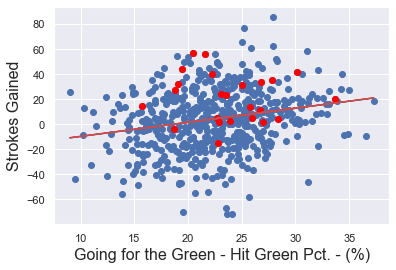

The r-squared is: 0.22359892077636703


<Figure size 432x288 with 0 Axes>

In [31]:
#Going for the Green - Hit Green Pct. - (%)

'''The percent of time a player attempting to go for the green is successful. 
A player is assumed to be going for the green if the first shot on a par 4 or second shot on a par 5 lands on 
or around the green. 

If the second shot on a par 5 lands in the water, it is included as well. 
Note: 'Around the green' indicates the ball is within 30 yards of the edge of the green; 
the shot must be determined by a laser to be included. (486)'''

x_values = df_row_merged['Going for the Green - Hit Green Pct. - (%)']
y_values = df_row_merged['SG: Approach-the-Green - (TOTAL SG:APP)']
f=df_row_merged.loc[df_row_merged['Label']==1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.scatter(f['Going for the Green - Hit Green Pct. - (%)'],f['SG: Approach-the-Green - (TOTAL SG:APP)'], color='red')
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Going for the Green - Hit Green Pct. - (%)',size=16)
# set y-axis label and specific size
plt.ylabel('Strokes Gained',size=16)

plt.show()

print(f"The r-squared is: {rvalue}")

# save the plot as PNG file with dpi=150
plt.savefig('Going_for_green.png', dpi=150)

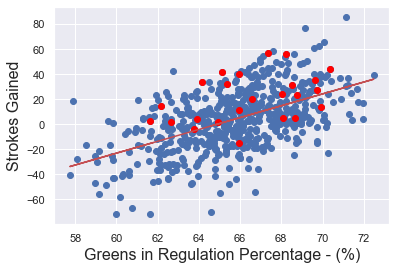

The r-squared is: 0.5363611562303197


<Figure size 432x288 with 0 Axes>

In [32]:
#Greens in Regulation Percentage - (%)

'''The percent of time a player was able to hit the green in regulation (greens hit in regulation/holes played). 
Note: A green is considered hit in regulation if any portion of the ball is touching the putting surface after the GIR stroke has been taken. 
(The GIR stroke is determined by subtracting 2 from par (1st stroke on a par 3, 2nd on a par 4, 3rd on a par 5))'''

x_values = df_row_merged['Greens in Regulation Percentage - (%)']
y_values = df_row_merged['SG: Approach-the-Green - (TOTAL SG:APP)']
f=df_row_merged.loc[df_row_merged['Label']==1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.scatter(f['Greens in Regulation Percentage - (%)'],f['SG: Approach-the-Green - (TOTAL SG:APP)'], color='red')
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Greens in Regulation Percentage - (%)',size=16)
# set y-axis label and specific size
plt.ylabel('Strokes Gained',size=16)

plt.show()

print(f"The r-squared is: {rvalue}")

# save the plot as PNG file with dpi=150
plt.savefig('Greens_in_regulation.png', dpi=150)

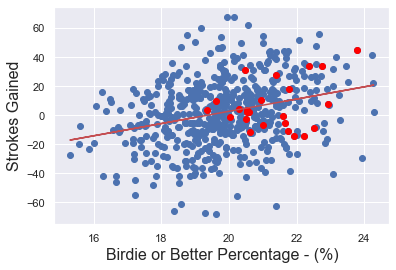

The r-squared is: 0.29080248336030007


<Figure size 432x288 with 0 Axes>

In [33]:
#Birdie or Better Percentage - (%)

x_values = df_row_merged['Birdie or Better Percentage - (%)']
y_values = df_row_merged['SG: Putting - (TOTAL SG:PUTTING)']
f=df_row_merged.loc[df_row_merged['Label']==1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.scatter(f['Birdie or Better Percentage - (%)'],f['SG: Putting - (TOTAL SG:PUTTING)'], color='red')
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Birdie or Better Percentage - (%)',size=16)
# set y-axis label and specific size
plt.ylabel('Strokes Gained',size=16)

plt.show()

print(f"The r-squared is: {rvalue}")

# save the plot as PNG file with dpi=150
plt.savefig('Birdie_or_Better_Percentage.png', dpi=150)

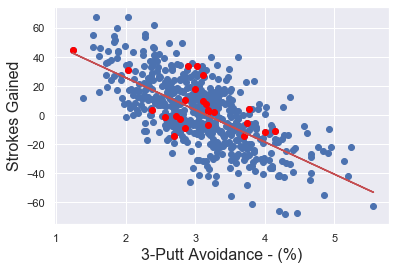

The r-squared is: -0.6651070973860359


<Figure size 432x288 with 0 Axes>

In [34]:
#3-Putt Avoidance - (%)

x_values = df_row_merged['3-Putt Avoidance - (%)']
y_values = df_row_merged['SG: Putting - (TOTAL SG:PUTTING)']
f=df_row_merged.loc[df_row_merged['Label']==1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.scatter(f['3-Putt Avoidance - (%)'],f['SG: Putting - (TOTAL SG:PUTTING)'], color='red')
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('3-Putt Avoidance - (%)',size=16)
# set y-axis label and specific size
plt.ylabel('Strokes Gained',size=16)

plt.show()

print(f"The r-squared is: {rvalue}")                                        

# save the plot as PNG file with dpi=150
plt.savefig('3_putt.png', dpi=150)